In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lib.simulation import SimulateSpectra
from lib.analysis import Inverter

%load_ext autoreload
%autoreload 2 

In [2]:
x = np.linspace(0, 10000, 1000)
simulation = SimulateSpectra(x)

simulation.add_line(A = 10, x0 = 500, std = 10)
simulation.add_line(A = 5, x0 = 2000, std = 35)
simulation.add_line(A = 15, x0 = 2500, std = 50)
simulation.add_line(A = 3, x0 = 4000, std = 40)

simulation.generate_spectrum()

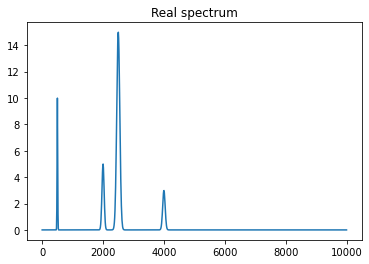

In [3]:
plt.plot(x, simulation.spectrum)
plt.title('Real spectrum')
plt.show()

In [4]:
simulation.define_shift_matrix(time_shifts = [800], decay_weights = [0.3])
measurements = simulation.simulate_measurements()

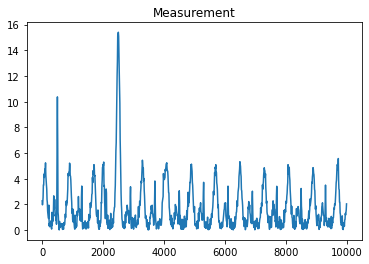

In [5]:
plt.plot(simulation.x, measurements[0,:])
plt.title('Measurement')
plt.show()

In [6]:
inverter = Inverter(x = simulation.x, y = measurements[0, :])
inverter.define_shift_matrix(time_shifts = [800], decay_weights = [0.3])
cleaned_spec = inverter.clean_spectrum()

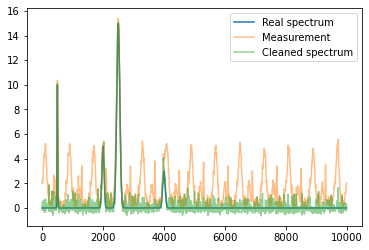

In [7]:
plt.plot(simulation.x, simulation.spectrum)
plt.plot(simulation.x, measurements[0, :], alpha = 0.5)
plt.plot(simulation.x, cleaned_spec, alpha = 0.5)
plt.legend(['Real spectrum', 'Measurement', 'Cleaned spectrum'])
plt.show()